In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import pickle
from copy import copy
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [27]:
dir  = r"C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\sonnet\LT402 Design/"
chip = 'LT402_32x32_4-8GHz'
path = dir + chip + '/'
with open('LT402chip6_master.pkl', 'rb') as f:
    master = pickle.load(f)
kid_id_board = np.load(path + chip + '_id.npy')
f0_mapped = master['trimmeasured']['f0']

In [28]:
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_25mK\Power/'
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_100mK\Power/'
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20251028\S21\Power/'
# df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot=False)
# display(df)
# with open('LT402chip6nibble_Qs_dark.pkl', 'wb') as f:
#     pickle.dump(df, f)

In [29]:
# with open('LT402chip6nibble_Qs_100mK.pkl', 'rb') as f:
with open('LT402chip6nibble_Qs_dark.pkl', 'rb') as f:
    df = pickle.load(f)
display(df)

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.024940,4.076475,1.092306e-07,41532.641648,89.037357,39446.295913,169.623895,-785252.820510,50180.934868,-74.563770,0.000028,0.265252
1,2,-116.0,0.024963,4.079549,1.145637e-07,46939.759531,119.140692,49963.154872,202.485445,775703.542127,48739.097721,-74.527180,0.000038,-0.293473
2,3,-116.0,0.024943,4.085663,1.128368e-07,55693.037330,165.406930,65619.243954,207.944728,368170.353637,6916.139659,-74.225793,0.000033,0.022448
3,4,-116.0,0.024953,4.090129,1.314088e-07,40081.252254,98.239551,47492.315088,122.617167,256852.694918,3760.959715,-75.678906,0.000030,-0.098598
4,5,-116.0,0.024940,4.093331,1.281476e-07,55390.265280,185.417904,59394.795196,284.729411,821542.985361,54696.428795,-73.840314,0.000050,-0.017052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,-116.0,0.024994,8.006784,4.815225e-07,33949.370685,123.551441,31816.631295,205.790783,-506463.478464,36086.448854,-75.381406,0.000155,0.318100
999,1000,-116.0,0.024989,8.011714,2.044271e-07,47372.852698,108.263814,52029.478484,156.799020,529307.041968,15970.885810,-74.623403,0.000051,-0.329978
1000,1001,-116.0,0.024993,8.053118,3.000527e-07,27772.225661,50.624740,29215.313694,75.205480,562248.640517,26499.324020,-76.755391,0.000043,-0.037628
1001,1002,-116.0,0.024990,8.063775,2.715363e-07,37531.673470,85.408604,35900.597431,155.720745,-826086.257122,59816.415954,-75.034557,0.000054,0.104340


-0.0031595197427246014


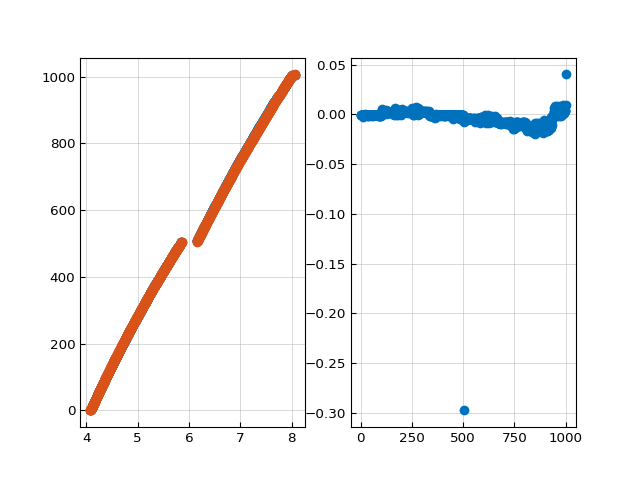

In [40]:
fig, axes = plt.subplot_mosaic('ab')
argsort = np.argsort(f0_mapped)

f0_fit = df['f0'][:-1]
f0_map = f0_mapped[argsort][:1008]

len_fit = len(f0_fit)
len_map = len(f0_map)
ids_map = np.arange(len_map)
ids_fit = (np.arange(len_fit) * len_map / len_fit).astype(int)

_, com_map, com_fit = np.intersect1d(ids_map, ids_fit, assume_unique=True, return_indices=True)
diff = f0_fit[com_fit] - f0_map[com_map]
offset = np.nanmean(diff[np.abs(diff) < 5e-2])
print(offset)
f0_map_corr = f0_map + offset
ax = axes['b']
ax.plot(diff, 'o ')
ax = axes['a']
ax.plot(f0_fit, ids_fit, 'o ')
ax.plot(f0_map, ids_map, 'o ')
# ax.plot(f0_map_corr, ids_map, 'o ')

[  32.    0.   11. ...  974.  990. 1000.]


IndexError: arrays used as indices must be of integer (or boolean) type

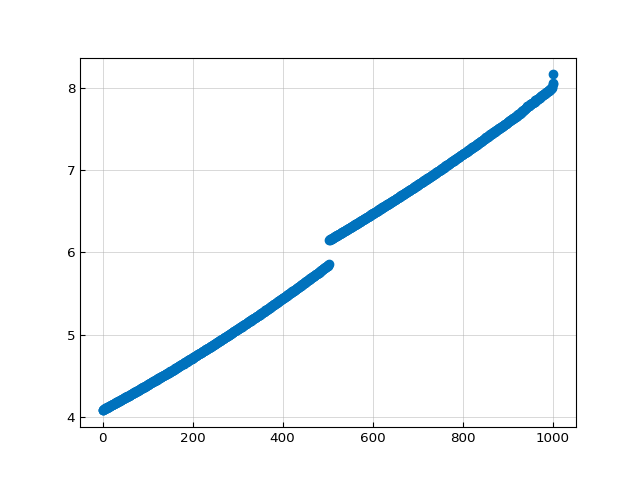

In [50]:
f0_fit = df['f0']
f0_map = f0_mapped

nr = len(f0_map)
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_map):
    closest = np.isnan
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_fit))
        if ~np.isnan(f0_fit[closest]):
            tone = f0_fit[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        idxs[prev_id] = np.nan
                    else:
                        closest = np.nan
                else:
                    print('more than one match')
                    closest = np.nan
            else:
                pass
        else:
            closest = np.nan
    else:
        closest = np.nan
    idxs[id] = int(closest)
print(idxs)
fig, ax = plt.subplots()
ax.plot(f0_fit, 'o ')
ax.plot(f0_map, 'o ')

double 9
double 10
double 14
double 17
double 22
double 36
double 59
double 76
double 84
double 88
double 92
double 96
double 123
double 132
double 155
too far 159
double 172
double 174
double 180
double 187
double 192
double 196
double 198
double 231
double 253
double 255
double 259
double 264
double 268
double 270
double 276
double 278
double 282
double 341
double 351
double 361
double 364
double 368
double 371
double 376
double 380
double 382
double 384
double 386
double 403
double 411
double 449
double 475
double 483
double 491
double 494
double 497
double 556
double 560
double 565
double 577
double 581
double 584
double 586
double 598
double 600
double 603
double 607
too far 609
too far 612
double 616
double 620
double 624
double 629
double 633
double 643
too far 644
double 651
double 653
double 657
double 660
double 666
double 676
double 686
double 694
double 735
double 737
double 744
double 746
too far 747
double 754
double 771
double 775
double 780
double 782
double 785
double 

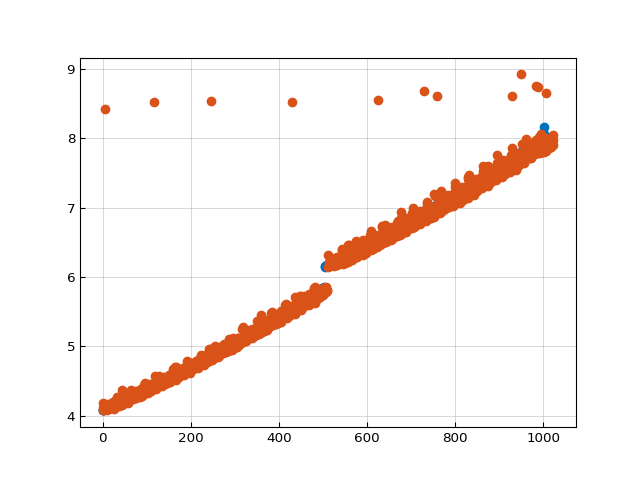

In [81]:
f0_fit = df['f0']
f0_map = f0_mapped

nr = len(f0_fit)
ids = np.empty(nr)
ids[:] = np.nan
thres = 2e-3
shifts = copy(ids)
for id, f0 in enumerate(f0_fit):
    diff = np.abs(f0 - f0_map)
    closest = np.nanargmin(diff)
    if closest in ids:
        print('double', id)
    elif diff[closest] > thres:
        print('too far', id)
    else:
        ids[id] = int(closest)
        shifts[id] = diff[closest]
    
fig, ax = plt.subplots()    
ax.plot(f0_fit, 'o ')
# ax.plot(f0_map[ids], 'o ')
ax.plot(f0_map, 'o ')

In [82]:
np.unique(f0_mapped)

array([4.07717574, 4.08015966, 4.08667429, ..., 8.75461221, 8.92162026,
              nan])

In [ ]:
f0_Q = df['f0']
Ql = df['Ql']
Qc = df['Qc']
Qi = df['Qi']
phi = df['phi']

min_df = 0.002
df0s = np.asarray(f0_Q)[1:] - np.asarray(f0_Q)[:-1]
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e4) & (Qi < 1e6)
Qc_mask = (Qc < 1.5e5) & (Qc > 0)
mask = Qi_mask & Qc_mask & ~too_close_mask
# mask = np.ones(len(df), dtype=bool)  # all
df_filtered = copy(df)
df_filtered[~mask] = np.nan
f0_Q = df_filtered['f0']
Ql = df_filtered['Ql']
Qc = df_filtered['Qc']
Qi = df_filtered['Qi']
phi = df_filtered['phi']
print('filtered:', np.sum(mask==False), '/', len(mask))
fig, ax = plt.subplots()
ax.set_title('LT402chip6nibbled')
ax.set_yscale('log')
ax.scatter(f0_Q, Ql, label='Q')
ax.scatter(f0_Q, Qc, label='Qc')
ax.scatter(f0_Q, Qi, label='Qi')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()

In [ ]:
nr = len(f0_mapped)
f0_dark = f0_Q
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        idxs[prev_id] = np.nan
                    else:
                        closest = np.nan
                else:
                    print('more than one match')
                    closest = np.nan
            else:
                pass
        else:
            closest = np.nan
    else:
        closest = np.nan
    idxs[id] = closest
print(idxs)


In [ ]:
fig, ax = plt.subplots()
ax.plot(f0_dark, 'o ', label='dark measured')
ax.plot(np.sort(f0_mapped), 'o ', label='dark measured')

In [9]:
df_sorted = pd.DataFrame(np.nan, index=np.arange(nr), columns=df_filtered.columns)
for i, idx in enumerate(idxs):
    if ~np.isnan(idx):
        df_sorted.iloc[i] = df_filtered.iloc[int(idx)]
    else:
        pass

In [ ]:
fig, axes = plt.subplot_mosaic('abcd;eeee', figsize=(12,6))
Ql = np.asarray(df_sorted['Ql'])
Qi = np.asarray(df_sorted['Qi'])
Qc = np.asarray(df_sorted['Qc'])
phi = np.asarray(df_sorted['phi'])
ax = axes['a']
ax.imshow(Ql[kid_id_board], vmin=2e4, vmax=6e4, origin='lower')
ax.set_title('Ql')
ax = axes['b']
ax.imshow(Qc[kid_id_board], vmin=2e4, vmax=6e4, origin='lower')
ax.set_title('Qc')
ax = axes['c']
ax.imshow(Qi[kid_id_board], vmin=5e5, vmax=1e6, origin='lower')
ax.set_title('Qi')
ax = axes['d']
ax.imshow(phi[kid_id_board], origin='lower')
ax.set_title('phi')
ax = axes['e']
ax.plot(f0_mapped, Ql, '.', label='Ql')
ax.plot(f0_mapped, Qc, '.', label='Qc')
ax.plot(f0_mapped, Qi, '.', label='Qi')
ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Quality factor')
ax.legend()


In [ ]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20251028\S21\2D/'
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_25mK\2D/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot=False)
display(df)


In [27]:
with open('LT402chip6nibble_QsvT.pkl', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
with open('LT402chip6nibble_QsvT_dark.pkl', 'rb') as f:
    df = pickle.load(f)
display(df)
fig, ax = plt.subplots()
temperatures = df['Temperature']
Ql = df['Ql']
Qc = df['Qc']
Qi = df['Qi']
ax.set_yscale('log')
ax.scatter(temperatures, Ql, label='Ql')
ax.scatter(temperatures, Qi, label='Qi')
ax.scatter(temperatures, Qc, label='Qc')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Quality Factors')
ax.legend()

In [ ]:
with open('LT402chip6nibble_QsvT.pkl', 'rb') as f:
    df = pickle.load(f)
with open('LT402chip6nibble_QsvT_dark.pkl', 'rb') as f:
    dfdark = pickle.load(f)
display(df)
fig, ax = plt.subplots()
T = df['Temperature']
T_dark = dfdark['Temperature']
Qi = df['Qi']
Qi_dark = dfdark['Qi']
ax.set_yscale('log')
ax.scatter(T, Qi, label='Qi')
ax.scatter(T_dark, Qi_dark, label='Qi')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Quality Factors')
ax.set_xlim(0,.15)
ax.set_ylim(1e3, 2e6)
ax.legend()